# EN3160  Assignment 01 
# Intensity Transformations and Neighborhood Filtering

### Name : Alahakoon U M Y B

### Index No: 210027C

### Date: 28/09/2025

Question 01 :  1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b.

In [48]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


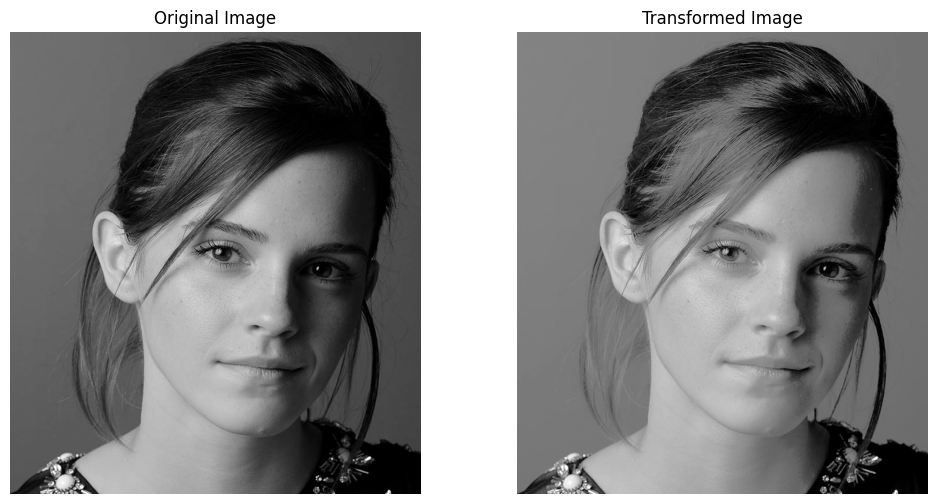

In [2]:
# load the image in Figb and read gray scale image
image_path = r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\emma.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  

transformed_image = np.copy(image)

transformed_image[image <= 50] = image[image <= 50] * 2  
transformed_image[(image > 50) & (image <= 150)] = 100 + (image[(image > 50) & (image <= 150)] - 50) * (50 / 100)
transformed_image[image > 150] = 150 + (image[image > 150] - 150) * (105 / 105)  

# Display original and transformed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')

plt.show()

 ### 2. Apply a similar operation as above (question 1) to accentuate
      
       (a) white matter

       (b) gray matter
       
 in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots

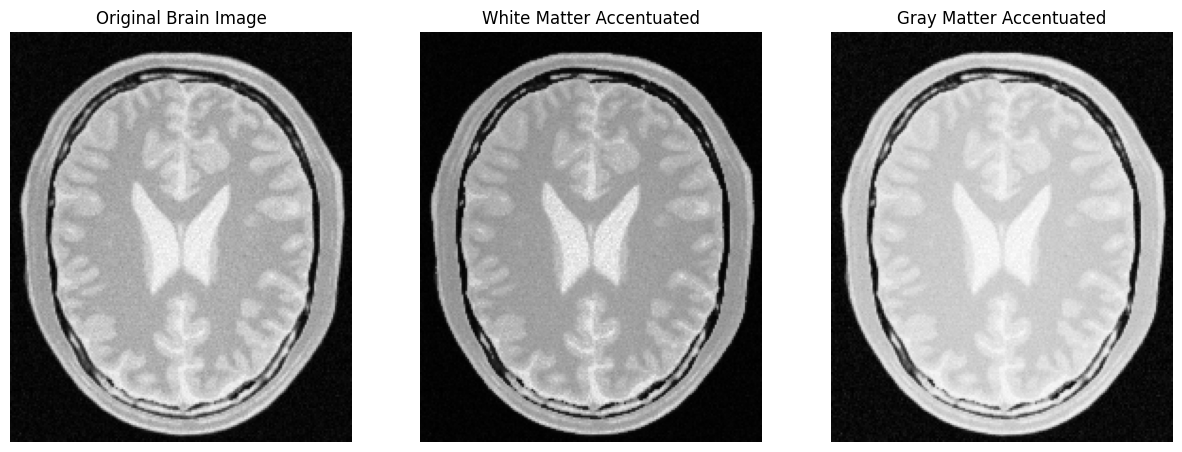

In [4]:
# Load the image in Fig 02 and read gray scale image
brain_image_path = r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\brain_proton_density_slice.png"
brain_image = cv2.imread(brain_image_path, cv2.IMREAD_GRAYSCALE)

white_matter_image = np.copy(brain_image)
gray_matter_image = np.copy(brain_image)

# Apply white matter transformation directly using numpy 
 # Compress lower intensities, Map mid-range to higher contrast and Increase contrast for higher intensities
white_matter_image[brain_image <= 100] = brain_image[brain_image <= 100] * 0.5 
white_matter_image[(brain_image > 100) & (brain_image <= 200)] = 100 + (brain_image[(brain_image > 100) & (brain_image <= 200)] - 100) * (80 / 100)  
white_matter_image[brain_image > 200] = 180 + (brain_image[brain_image > 200] - 200) * (75 / 55)   

# Apply gray matter transformation directly using numpy 
# Keep lower intensities as is, linearly increase contrast in mid-range and compress high intensities
gray_matter_image[brain_image <= 50] = brain_image[brain_image <= 50] * 1  
gray_matter_image[(brain_image > 50) & (brain_image <= 150)] = 50 + (brain_image[(brain_image > 50) & (brain_image <= 150)] - 50) * (100 / 100)  
gray_matter_image[brain_image > 150] = 150 + (brain_image[brain_image > 150] - 150) * 0.5  

# Display Images - original, White matter transformed and Gray matter accentuated
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(brain_image, cmap='gray')
plt.title("Original Brain Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(white_matter_image, cmap='gray')
plt.title("White Matter Accentuated")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_matter_image, cmap='gray')
plt.title("Gray Matter Accentuated")
plt.axis('off')

plt.show()

white_matter_transformation focuses on higher intensities, accentuating the white matter in the image.

gray_matter_transformation enhances the mid-range intensity values where gray matter typically resides.

### 3. Consider the image shown in Fig. 3


 (a) Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value.

 (b) Show the histograms of the original and corrected images

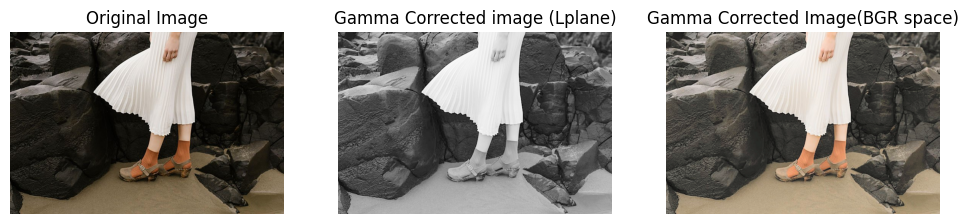

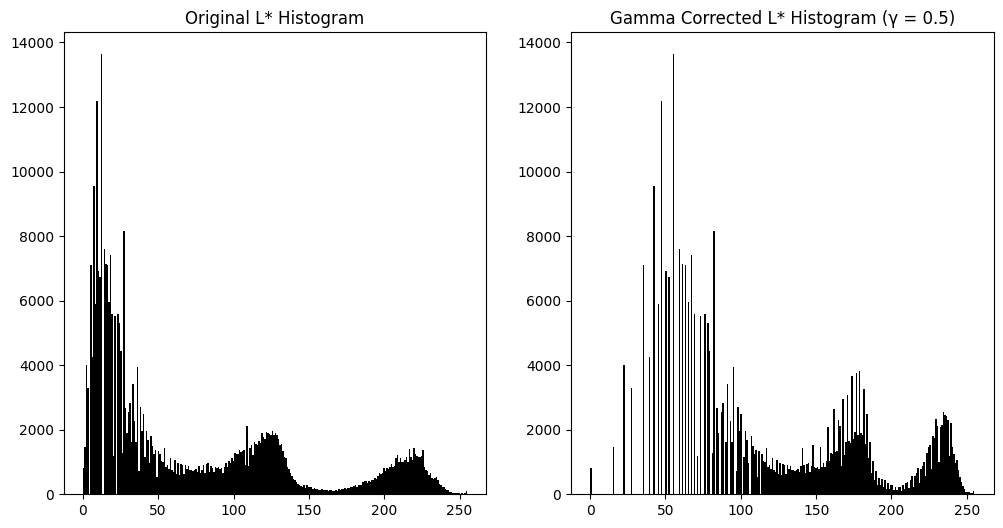

In [15]:
# Load the image and read
image_path_fig3 = r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\highlights_and_shadows.jpg"
image_fig3 = cv2.imread(image_path_fig3)

# Convert the image to L*a*b* color space
LAB_Space_Img = cv2.cvtColor(image_fig3, cv2.COLOR_BGR2LAB)
L, A, B = cv2.split(LAB_Space_Img)

# Apply gamma correction to the L* plane
gamma = 0.5  
L_plane_gamma_corrected = np.array(255 * (L / 255) ** gamma, dtype='uint8')

# Merge corrected L* back with a* and b*, and convert back to BGR color space
Fig3_Img_gamma_corrected = cv2.merge((L_plane_gamma_corrected, A, B))
gamma_corrected_Fig3_Img_image = cv2.cvtColor(Fig3_Img_gamma_corrected, cv2.COLOR_LAB2BGR)

# (a) plot Original image and gamma corrected image
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_fig3, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(L_plane_gamma_corrected, cv2.COLOR_BGR2RGB))
plt.title(f"Gamma Corrected image (Lplane)")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(gamma_corrected_Fig3_Img_image, cv2.COLOR_BGR2RGB))
plt.title("Gamma Corrected Image(BGR space)")
plt.axis('off')
plt.show()

# (b) Plot histograms of original and corrected L* planes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(L.ravel(), bins=256, range=(0, 255), color='black')
plt.title("Original L* Histogram")
plt.subplot(1, 2, 2)
plt.hist(L_plane_gamma_corrected.ravel(), bins=256, range=(0, 255), color='black')
plt.title(f"Gamma Corrected L* Histogram (γ = {gamma})")
plt.show()


### Q4. Increasing the vibrance of a photograph is probably achieved by applying an intensity transformation such as

$$ 
f(x) = \min\left(x + a \times 128 e^{-\frac{(x - 128)^2}{2\sigma^2}}, 255\right) 
$$

where:
- **x**: Input intensity of the image pixel.
- **a**: A scaling factor that controls the strength of the enhancement, where \( a \) is in the range \([0, 1]\).
- **σ**: A parameter that determines the spread of the Gaussian function used in the transformation, set to 70.

 (a) Split the image shown in Fig. 4 into hue, saturation, and value planes.

 (b) Apply the aforementioned intensity transformation to the saturation plane.

 (c) Adjust a to get a visually pleasing output. Report the value of a.

 (d) Recombine the three planes.

 (e) Display the original image, vibrance-enhanced image, and the intensity transformation
.


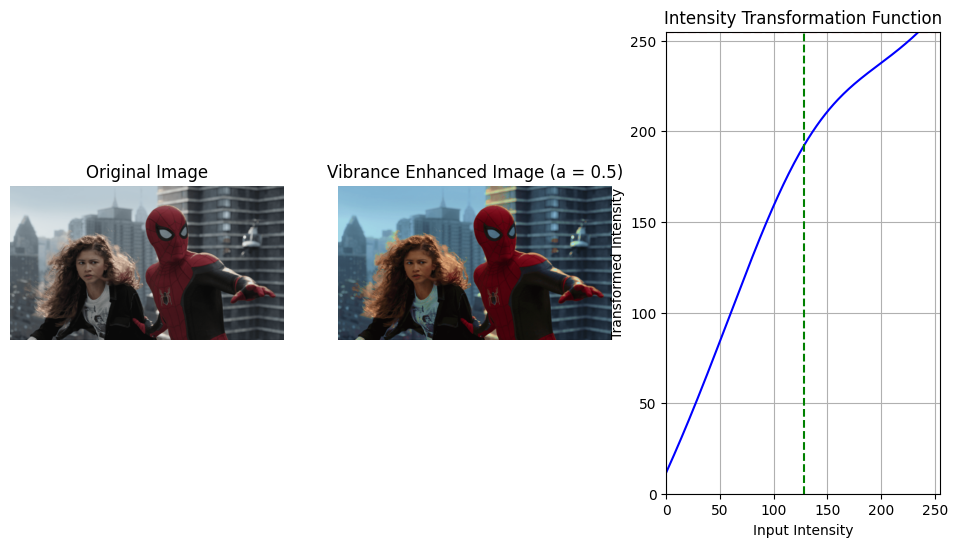

In [22]:
# Load the image in Fig4
image_path_fig4 = r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\spider.png"
image_fig4 = cv2.imread(image_path_fig4)

# (a) Convert the image to HSV color space
hsv_image = cv2.cvtColor(image_fig4, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv_image)

# (b) Define  aforementioned intensity transformation to the saturation plane and apply transformation
def aforementioned_intensity_transformation(x, a, sigma=70):
    return np.minimum(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)

# (c) used 'a' value
a = 0.5  
S_vibrant = aforementioned_intensity_transformation(S, a)

# (d) Recombine the three planes
S_vibrant = S_vibrant.astype(np.uint8)
hsv_transformed = cv2.merge((H, S_vibrant, V))
vibrant_image = cv2.cvtColor(hsv_transformed , cv2.COLOR_HSV2BGR)

# (e) Display original and vibrance-enhanced images, and Intensity Transformation Function
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_fig4, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(vibrant_image, cv2.COLOR_BGR2RGB))
plt.title(f"Vibrance Enhanced Image (a = {a})")
plt.axis('off')

x = np.arange(0, 256)  
transformed_values = aforementioned_intensity_transformation(x, a)
plt.subplot(1, 3, 3)
plt.plot(x, transformed_values, color='blue')
plt.title("Intensity Transformation Function")
plt.xlabel("Input Intensity")
plt.ylabel("Transformed Intensity")
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.grid()
plt.axhline(255, color='red', linestyle='--')  
plt.axvline(128, color='green', linestyle='--') 
plt.show()

 ### 5. Write a function of your own to carry out histogram equalization on the image shown in Fig. 5. Show the histograms before and after equalization

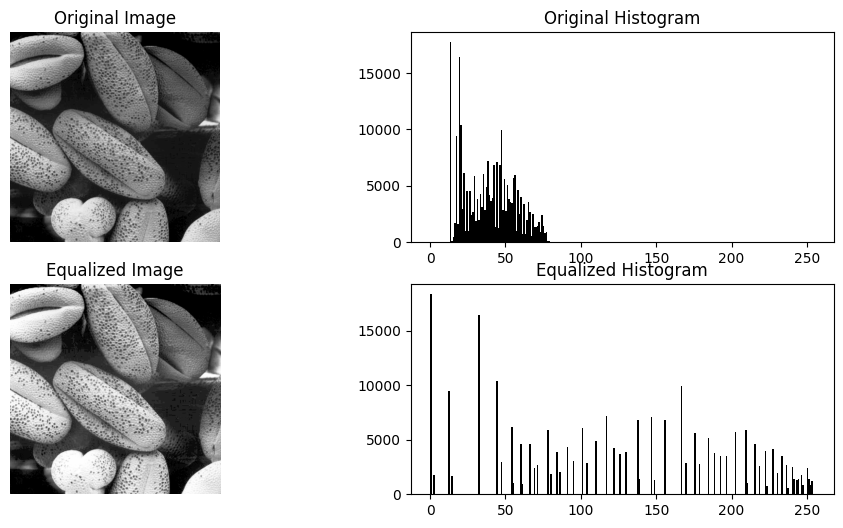

In [24]:
# Load the image in Fig5.
image_path_fig5 = r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\shells.tif"
image_fig5 = cv2.imread(image_path_fig5, cv2.IMREAD_GRAYSCALE)

# Function for histogram equalization
def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized_image = cdf[image]
    return equalized_image


# Perform histogram equalization
equalized_image = histogram_equalization(image_fig5)


# Plot original and equalized histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(image_fig5, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(2, 2, 2)
plt.hist(image_fig5.ravel(), bins=256, range=(0, 255), color='black')
plt.title("Original Histogram")

# Equalized image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')
plt.subplot(2, 2, 4)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 255), color='black')
plt.title("Equalized Histogram")

plt.show()


 ### 6. In this question, we will apply histogram equalization only to the foreground of an image to produce an image with a histogram equalized foreground.
 
 (a) Open the image in Fig. 6, split it into hue, saturation, and values and display these planes in grayscale.

 (b) Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.

 (c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.

 (d) Obtain the cumulative sum of the histogram using np.cumsum.

 (e) Use the formulas in slides to histogram-equalize the foreground.

 (f) Extract the background and add with the histogram equalized foreground.

 Show the hue, saturation, and value plane, the mask, the original image, and the result with the histogram
 equalized foreground

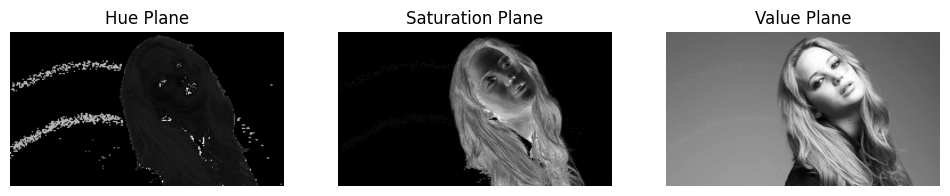

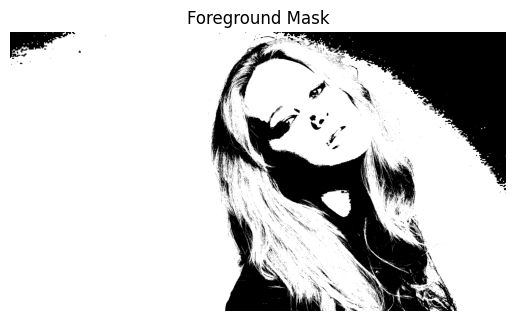

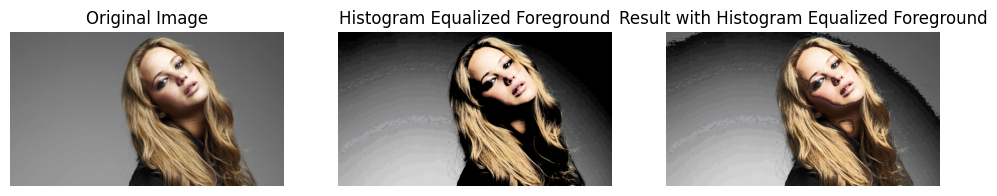

In [30]:
# Load the image for Q6
image_path_fig6 = r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\jeniffer.jpg"
image_fig6 = cv2.imread(image_path_fig6)

# (a) Convert to HSV color space and split into H, S, V channels and display gray scale images
hsv_image_fig6 = cv2.cvtColor(image_fig6, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv_image)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(H, cmap='gray')
plt.title("Hue Plane")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(S, cmap='gray')
plt.title("Saturation Plane")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(V, cmap='gray')
plt.title("Value Plane")
plt.axis('off')
plt.show()

# (b) Select appropriate plane to threshold in extract the foreground mask
_, mask = cv2.threshold(V, 100, 255, cv2.THRESH_BINARY)
plt.imshow(mask, cmap='gray')
plt.title("Foreground Mask")
plt.axis('off')
plt.show()

# (c) Use the mask to extract the foreground
foreground = cv2.bitwise_and(image_fig6, image_fig6, mask=mask)
V_foreground = cv2.bitwise_and(V, V, mask=mask)
hist = cv2.calcHist([V_foreground], [0], mask, [256], [0, 256])

# (d) Obtain the cumulative sum 
cumulative_hist = np.cumsum(hist)

# (e) Histogram equalization of the foreground
cumulative_hist_normalized = (cumulative_hist / cumulative_hist[-1]) * 255
V_equalized = np.zeros_like(V_foreground)

# Map the pixels in the foreground to equalized values
for i in range(256):
    V_equalized[V_foreground == i] = cumulative_hist_normalized[i]

# Recombine the equalized V with the original H and S channels 
hsv_New = cv2.merge((H, S, V_equalized.astype(np.uint8)))
foreground_equalized_image = cv2.cvtColor(hsv_New, cv2.COLOR_HSV2BGR)

# (f) Extract the background using the mask and combine background with enhanced fopreground
background = cv2.bitwise_and(image_fig6, image_fig6, mask=cv2.bitwise_not(mask))
result_image = cv2.add(foreground_equalized_image, background)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_fig6, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(foreground_equalized_image, cv2.COLOR_BGR2RGB))
plt.title("Histogram Equalized Foreground")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Result with Histogram Equalized Foreground")
plt.axis('off')
plt.show()


### 7. Filtering with the Sobel operator can compute the gradient. Consider the image shown in Fig. 7

(a) Using the existing 2D filter to Sobel filter the image.

(b) Write your own code to Sobel filter the image.

(c) Using the property:

$$
\begin{bmatrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1
\end{bmatrix}
=
\begin{bmatrix}
1 \\
2 \\
1
\end{bmatrix}
*
\begin{bmatrix}
1 & 0 & -1
\end{bmatrix}
$$

Carry out Sobel filtering.


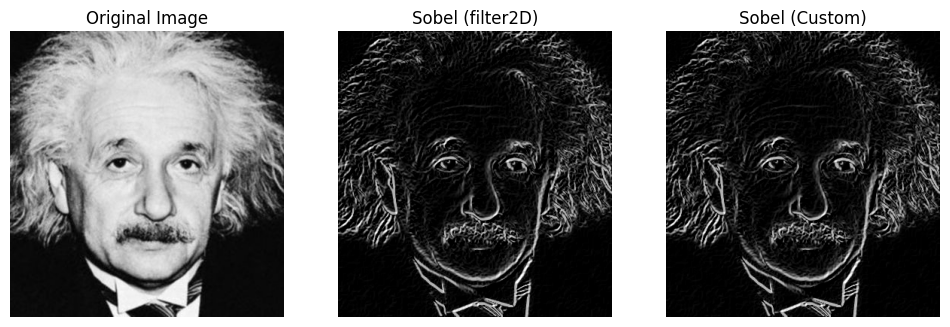

In [37]:
# Load the image for Sobel filtering
image_path_fig7 = r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\einstein.png"
image_fig7 = cv2.imread(image_path_fig7, cv2.IMREAD_GRAYSCALE)

# (a) Using filter2D for Sobel filtering
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
filtered_image_x = cv2.filter2D(image_fig7, -1, sobel_x)
filtered_image_y = cv2.filter2D(image_fig7, -1, sobel_y)

# compute the gradient magnitude and Normalize 
gradient_magnitude = cv2.magnitude(filtered_image_x.astype(float), filtered_image_y.astype(float))
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# (b) My own Sobel filter code
def sobel_filter(image):
    sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    gx = cv2.filter2D(image, -1, sobel_x)
    gy = cv2.filter2D(image, -1, sobel_y)
    
    # compute the gradient magnitude and Normalize
    gradient = cv2.magnitude(gx.astype(float), gy.astype(float))
    return cv2.normalize(gradient, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

sobel_designed = sobel_filter(image_fig7)

# (c) Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_fig7, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Sobel (filter2D)")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(sobel_designed, cmap='gray')
plt.title("Sobel (Custom)")
plt.axis('off')
plt.show()


 ### 8.Write a program to zoom images by a given factor s ∈ (0,10]. You must use a function to zoom the image, which can handle

 (a) nearest-neighbor,and

 (b) bilinearinterpolation.

Ihave included four images, two large originals, and there zoomed-out versions. Test you algorithm by
 computing the normalized sum of squared difference (SSD) when you scale-up the given small images by a
 factor of 4 by comparing with the original images

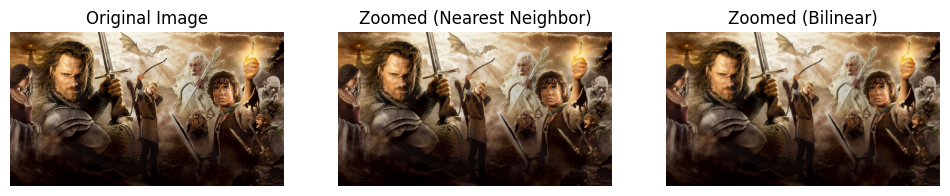

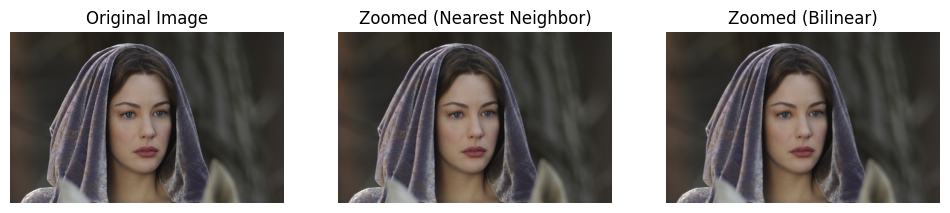

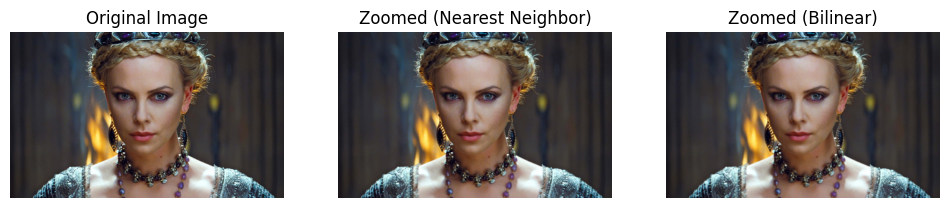

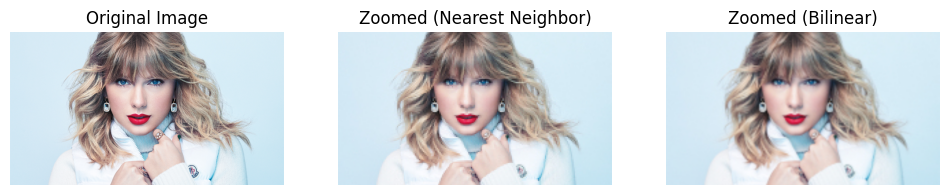

SSD for im01.png - Nearest Neighbor: 408.81, Bilinear: 345.28
SSD for im02.png - Nearest Neighbor: 79.34, Bilinear: 55.04
SSD for im03.png - Nearest Neighbor: 187.92, Bilinear: 149.63
SSD for taylor.jpg - Nearest Neighbor: 686.06, Bilinear: 676.30


In [49]:
def zoom_image(image, zoom_factor, interpolation='nearest'):

    if interpolation == 'nearest':
        return cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_NEAREST)
    elif interpolation == 'bilinear':
        return cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_LINEAR)
    else:
        raise ValueError("Interpolation must be 'nearest' or 'bilinear'.")

def calculate_ssd(original, zoomed):
 
    zoomed_resized = cv2.resize(zoomed, (original.shape[1], original.shape[0]))
    ssd = np.sum((original.astype(np.float32) - zoomed_resized.astype(np.float32)) ** 2)
    return ssd / (original.shape[0] * original.shape[1])

image_paths = [
    r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\a1q5images\im01.png",
    r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\a1q5images\im01small.png",
    r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\a1q5images\im02.png",
    r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\a1q5images\im02small.png",
    r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\a1q5images\im03.png",
    r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\a1q5images\im03small.png",
    r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\a1q5images\taylor.jpg",
    r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\a1q5images\taylor_small.jpg",
    r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\a1q5images\taylor_very_small.jpg"
]
zoom_factor = 4
ssd_results = []

# Process images in pairs
for i in range(0, len(image_paths) - 1, 2):  # Ensure there's always a small image available
    original_image = cv2.imread(image_paths[i], cv2.IMREAD_COLOR)
    small_image = cv2.imread(image_paths[i + 1], cv2.IMREAD_COLOR)
    
    # Zoom the small image using both methods
    zoomed_nearest = zoom_image(small_image, zoom_factor, interpolation='nearest')
    zoomed_bilinear = zoom_image(small_image, zoom_factor, interpolation='bilinear')
    
    # Calculate SSD
    ssd_nearest = calculate_ssd(original_image, zoomed_nearest)
    ssd_bilinear = calculate_ssd(original_image, zoomed_bilinear)
    ssd_results.append((image_paths[i], ssd_nearest, ssd_bilinear))
    
    # Display results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(zoomed_nearest, cv2.COLOR_BGR2RGB))
    plt.title("Zoomed (Nearest Neighbor)")
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(zoomed_bilinear, cv2.COLOR_BGR2RGB))
    plt.title("Zoomed (Bilinear)")
    plt.axis('off')
    plt.show()

# display SSD results
for img_path, ssd_nn, ssd_bl in ssd_results:
    print(f"SSD for {os.path.basename(img_path)} - Nearest Neighbor: {ssd_nn:.2f}, Bilinear: {ssd_bl:.2f}")


### 9. Fig. 8 shows a flower image with both the foreground and background are in focus.

 (a) Use grabCut to segment the image. Show the final segmentation mask, foreground image, and
 background image.

 (b) Produce an enhanced image with a substantially blurred background. Display the original image
 alongside the enhanced image.

 (c) Why is the background just beyond the edge of the flower quite dark in the enhanced image?

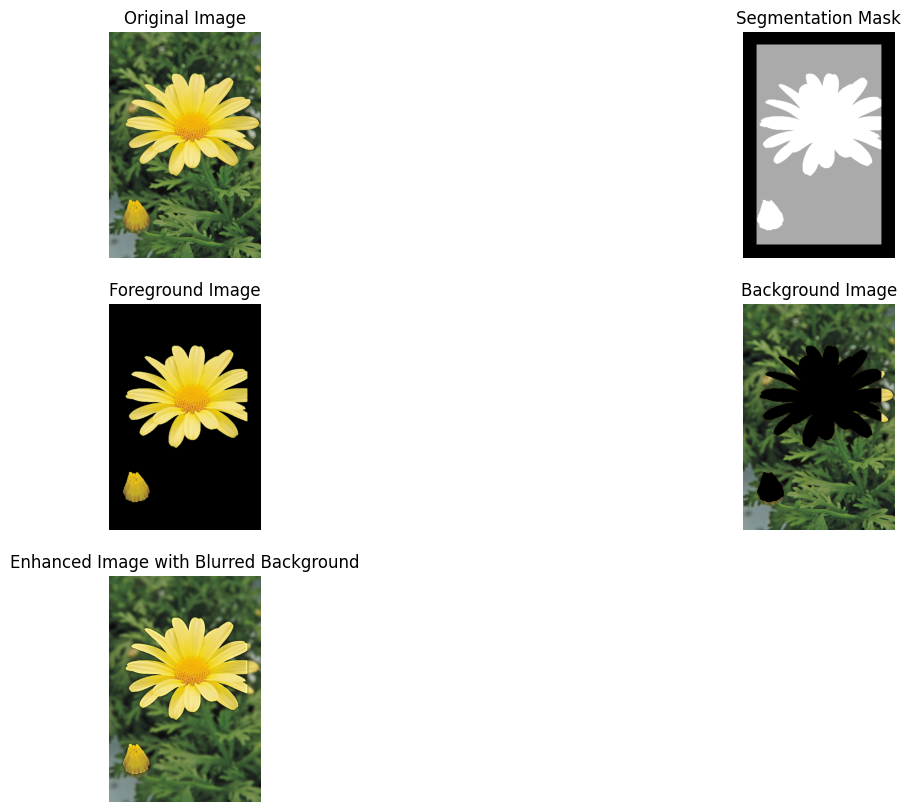

In [47]:
# Load the flower fig8 image
image_pathfig8 = r"C:\Users\Yasiru Alahakoon\Desktop\Image Processing And Machine Vision\Assignment01_Yasiru_Alahakoon\a1images\daisy.jpg"
fig8_image = cv2.imread(image_pathfig8)

# Initialize mask, background, and foreground models
mask = np.zeros(fig8_image.shape[:2], np.uint8)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# GrabCut segmentation
rect = (50, 50, fig8_image.shape[1] - 100, fig8_image.shape[0] - 100)
cv2.grabCut(fig8_image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Mask (Extract background)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
foreground = fig8_image * mask2[:, :, np.newaxis]
mask_background = np.where(mask2 == 0, 1, 0).astype('uint8')
background_img = fig8_image * mask_background[:, :, np.newaxis]

# Blur the background and combine with foreground
blurred_background = cv2.GaussianBlur(background, (21, 21), 0)
enhanced_image = cv2.add(foreground, blurred_background)

# Display results
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(fig8_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.subplot(3, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Segmentation Mask")
plt.axis('off')
plt.subplot(3, 2, 3)
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.title("Foreground Image")
plt.axis('off')
plt.subplot(3, 2, 4)
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.title("Background Image")
plt.axis('off')
plt.subplot(3, 2, 5)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title("Enhanced Image with Blurred Background")
plt.axis('off')
plt.show()
